# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Data Visualization with Matplotlib
### Learning Objectives
*After this lesson, you will be able to:
- use the Matplotlib API to create plots
- compare the use of explicit and implicit Matplotlib APIs



### Part 2: Data Visualization with Matplotlib

We have already started to use Matplotlib when we used Pandas to create our plots using the DataFrame objects.As before:

- We use the `matplotlib.pyplot` module to help create our plots. This will give us many customization options.
- To make our plots display within this notebook, we will have to set the option `%matplotlib inline`.
- To save our plots to file, we can use `plt.savefig(filename)`
- You can change the *style* of the plots, refer to [Matplotlib Stylesheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

Let's start with the required imports:


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display within the Jupyter notebook
%matplotlib inline

# set stylesheet using pyplot
plt.style.use('ggplot')
# You can try other styles such as 'classic', 'ggplot', grayscale'


### 2.1 Explicitly Creating Figure and Axes Objects

There are a few ways to create plots using Matplotlib. The method that provides the most flexibility and options is to create and instantiate separate Axes objects for creating the plots.

You can customize various components of the figure: 

![Anatomy of a figure](https://matplotlib.org/stable/_images/anatomy.png).

### Matplotlib Figure

Matplotlib creates plots within Figures. Calling `figure()` with pyplot will create an empty figure.


In [2]:
plt.figure()

<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

### Matplotlib Axes

The figure may contain one or more Axes, which are the actual plots that will be created. The `subplots()` function returns a tuple consisting of the figure and a set of Axes.


(<Figure size 960x720 with 1 Axes>, <Axes: >)

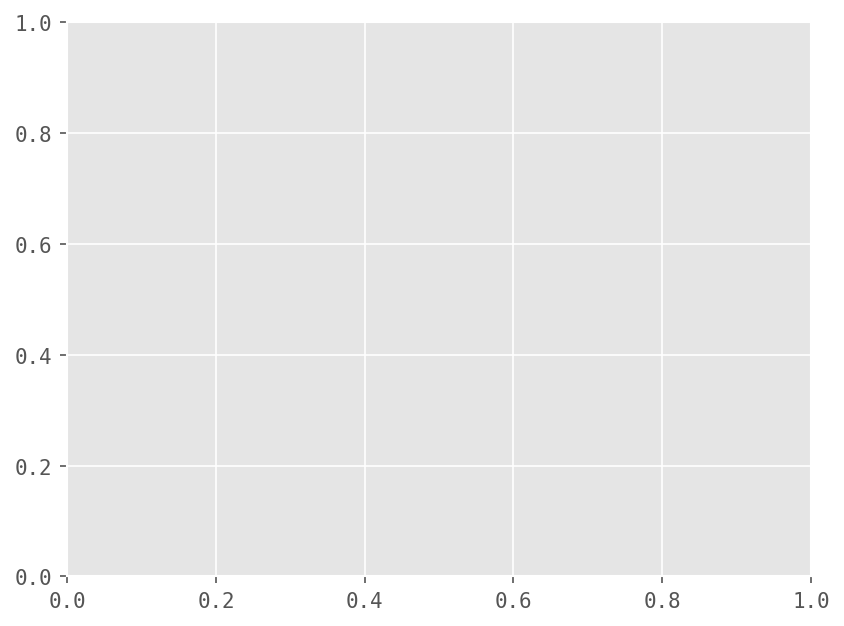

In [3]:
plt.subplots()

### Referencing the Axes

We can refer to the objects in the returned tuple.  Setting up our plots in the following way will give us more control over the various plot elements.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


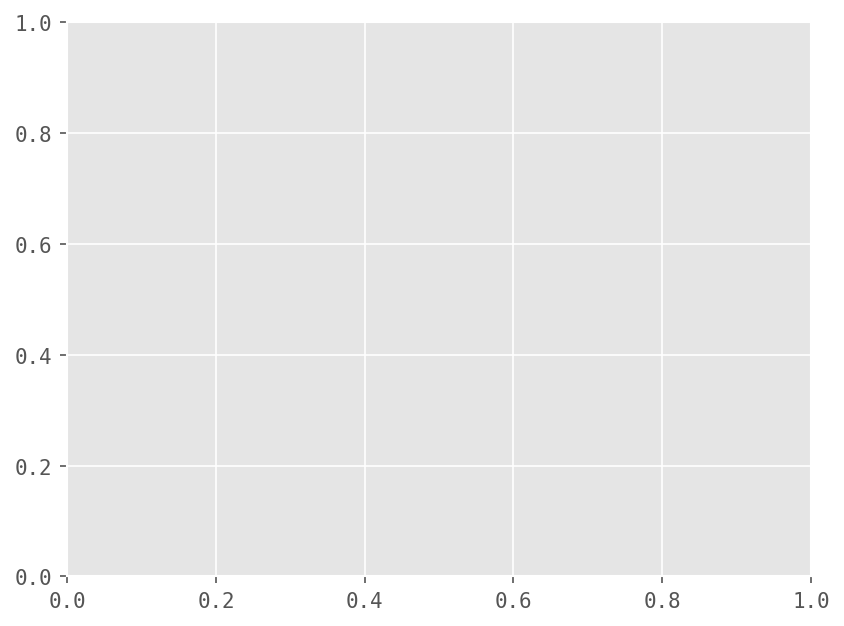

In [4]:
# Creating a figure with one Axes
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))


#### Adding a plot

We will look creating more subplots later, but for now let's try a simple plot on the Axes. 


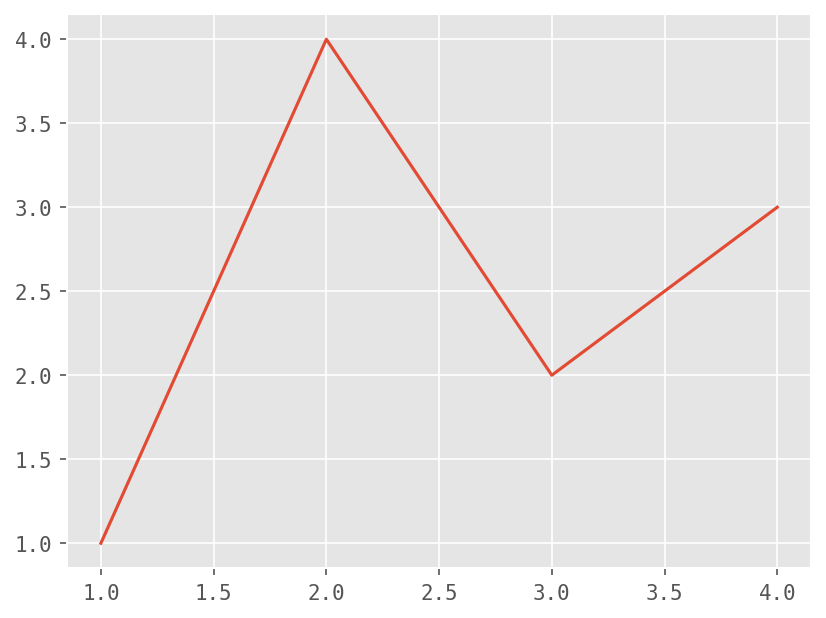

In [5]:
# Creating a figure with one Axes
fig, ax = plt.subplots()
x_val=(1, 2, 3, 4)
y_val=(1, 4, 2, 3)
ax.plot(x_val, y_val )

### Load in data sets for visualization



In [6]:
# use the returned_orders that we joined in the previous lab
# this shows more information about each product - category, subcategory, etc
orders = pd.read_csv('datasets/returned_orders.csv')
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,product_name,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned,discount_level
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,"Sauder Library with Doors, Traditional",360.51,3 days,2022,7,3,Thursday,Low,No,High
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,"Dania Corner Shelving, Metal",70.50,-174 days,2020,7,4,Friday,High,No,Low
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,"Dania Classic Bookcase, Pine",239.04,153 days,2020,7,3,Thursday,High,No,None
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,"Dania Classic Bookcase, Pine",239.04,67 days,2019,7,1,Tuesday,High,No,Low
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,"Dania Classic Bookcase, Pine",239.04,122 days,2019,8,0,Monday,High,No,Low


<a id="histograms"></a>
## Histograms using Matplotlib

Previously, we have used Pandas to create our plots. Let's compare the difference between:

- using the DataFrame : `DataFrame.hist()` 
- explicitly using the Axes object: `Axes.hist()` 

For example, we can visualise the distribution of the `sales` in orders:


Text(0, 0.5, 'Number of Orders')

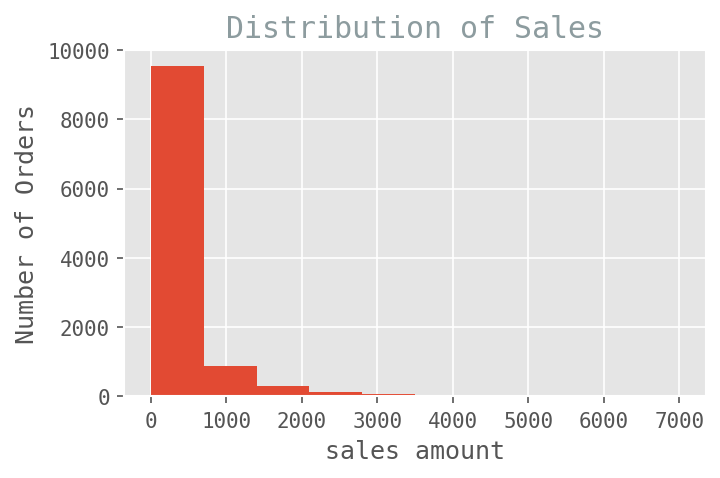

In [7]:
# USing Pandas
orders.hist('sales', figsize=(5,3))

# Set the titles
plt.title('Distribution of Sales')
plt.xlabel('sales amount')
plt.ylabel('Number of Orders')


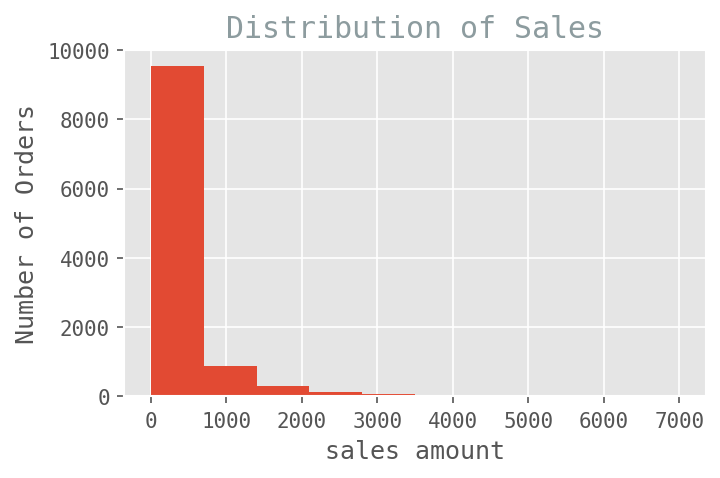

In [29]:
# Using pyplot - what's the difference?

# Setup figure and axes and total size of figure
fig, ax = plt.subplots(figsize=(5,3))

# Create a histogram on the data in the discount column
ax.hist(orders['sales'])

# Set the titles
plt.title('Distribution of Sales')
plt.xlabel('sales amount')
plt.ylabel('Number of Orders')
plt.show()


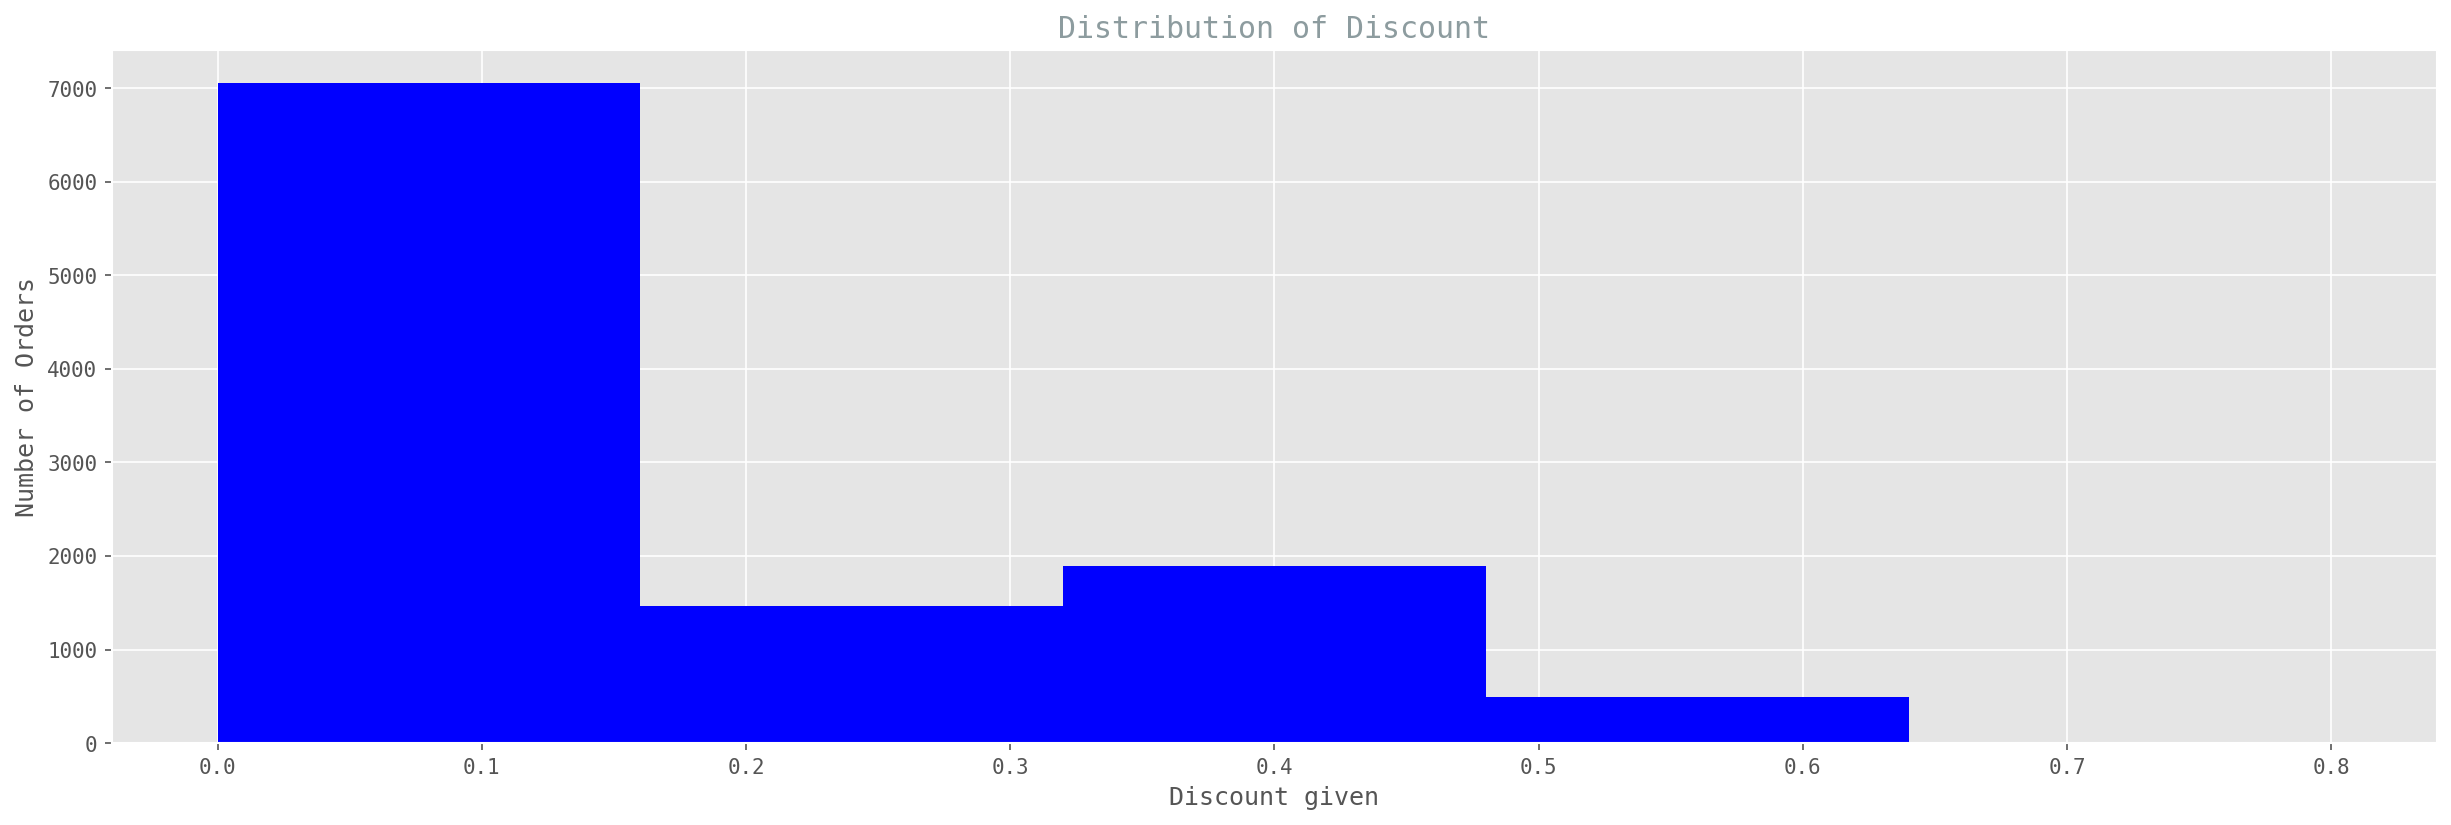

In [34]:
# Setup figure and axes and total size of figure
fig, ax = plt.subplots(figsize=(20,6))

# Create a histogram with 5 bins and blue bars
ax.hist(orders['discount'], bins=5, color='b')

# Set the titles
plt.title('Distribution of Discount')
plt.xlabel('Discount given')
plt.ylabel('Number of Orders')

# show the plot, but not the last output
plt.savefig('Histogram of Discount')
plt.show()


### Showing Data Labels

The advantage of using Pyplot is that we do have more control over what we can customize. 

Notice the objects that are returned by two `hist()` methods above. 

`ax.hist()` returns a tuple of three objects:
```
(array([9.539e+03, 8.740e+02, 2.820e+02, 1.130e+02, 6.600e+01, 2.700e+01,
        9.000e+00, 6.000e+00, 5.000e+00, 2.000e+00]),
 array([2.880000e+00, 7.024560e+02, 1.402032e+03, 2.101608e+03,
        2.801184e+03, 3.500760e+03, 4.200336e+03, 4.899912e+03,
        5.599488e+03, 6.299064e+03, 6.998640e+03]),
 <BarContainer object of 10 artists>)
```

The first one is the array of the frequency values (the height of the histogram bars), the second one are the bin thresholds, and the third are the bars that are actually plotted.

We can use access these returned objects to customize the format of the plots. 

We can store these three objects into three variables as below, so that we can display the bar labels.

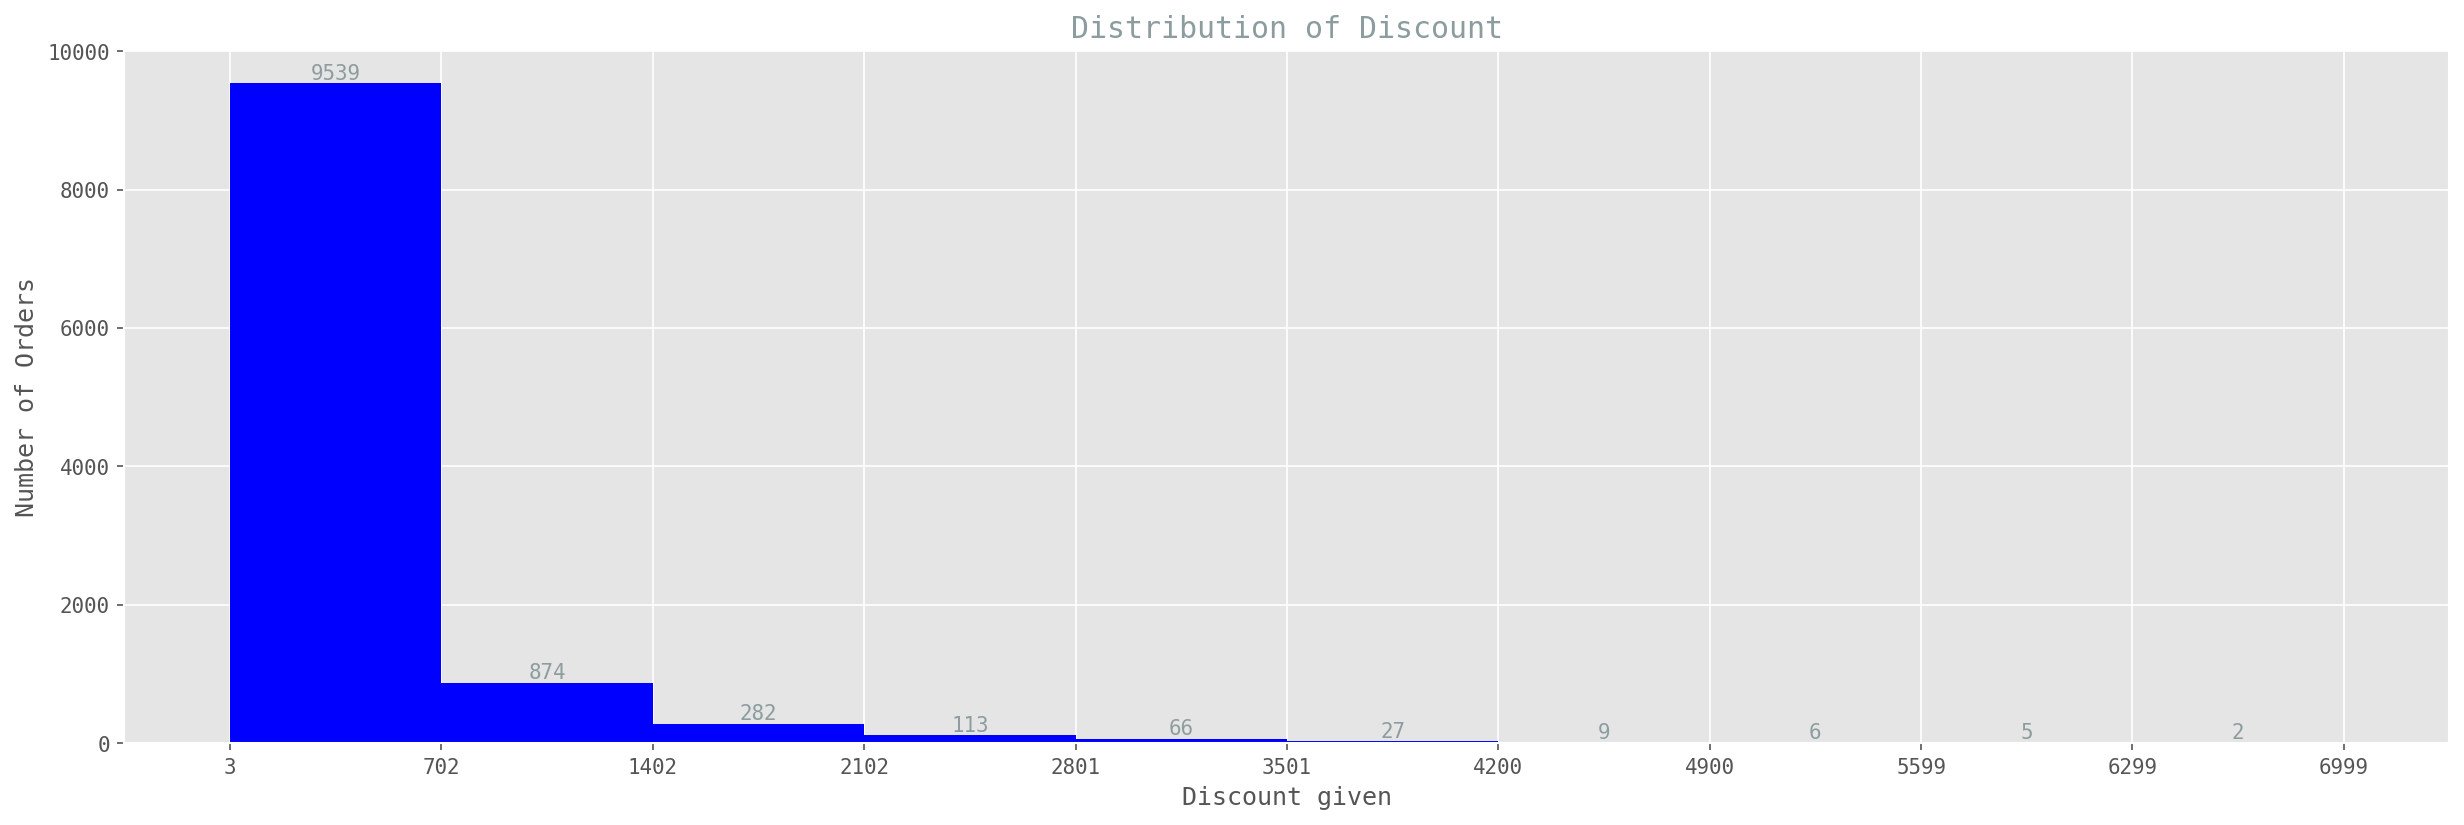

In [38]:
# Setup figure and axes and total size of figure
fig, ax = plt.subplots(figsize=(20,6))

# Create a histogram with 15 bins and blue bars
# store the result into three different variables
values, bins, bars = ax.hist(orders['sales'], color='b')

# Set the titles
plt.title('Distribution of Discount')
plt.xlabel('Discount given')
plt.ylabel('Number of Orders')

# show the bar labels
plt.bar_label(bars)

# mark the bin positions
plt.xticks(bins)

# show the plot, but not the last output
plt.show()


### Subplots

We can also create a figure with multiple subplots, where each subplot is an Axes object. 

The default number of rows and columns is 1. However, we can define the number of subplots that we want in a figure.

Try changing the values of the arguments below.

Text(0.5, 1.0, 'Row 1 Col 1')

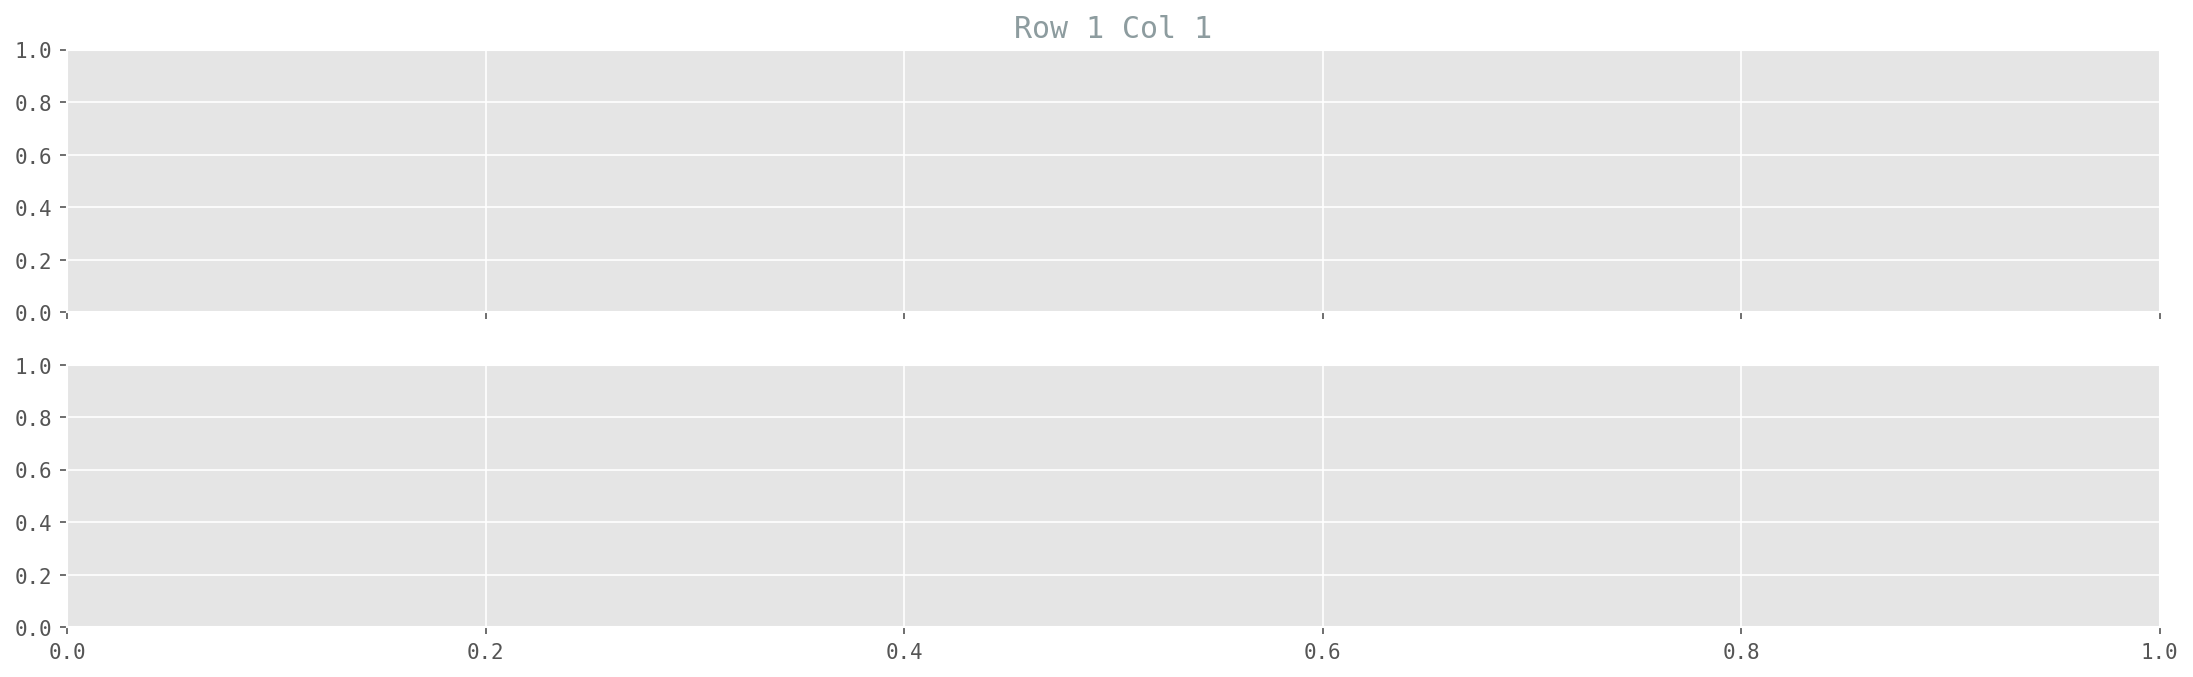

In [11]:
## Test setting up subplots
fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(18,5), sharex=True, sharey=True)
ax[0].set_title('Row 1 Col 1')

#### Adding subplots

As you can see the variable `ax` is an array, so we can manage each of the Axes separately.

(array([9.539e+03, 8.740e+02, 2.820e+02, 1.130e+02, 6.600e+01, 2.700e+01,
        9.000e+00, 6.000e+00, 5.000e+00, 2.000e+00]),
 array([2.880000e+00, 7.024560e+02, 1.402032e+03, 2.101608e+03,
        2.801184e+03, 3.500760e+03, 4.200336e+03, 4.899912e+03,
        5.599488e+03, 6.299064e+03, 6.998640e+03]),
 <BarContainer object of 10 artists>)

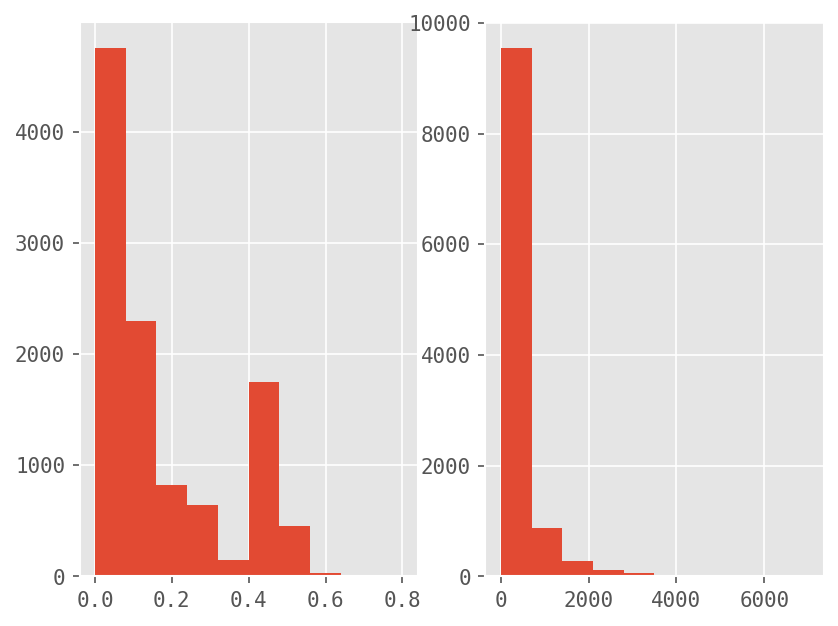

In [12]:
plt.subplot(1,2,1)
plt.hist(orders['discount'])

plt.subplot(1,2,2)
plt.hist(orders['sales'])


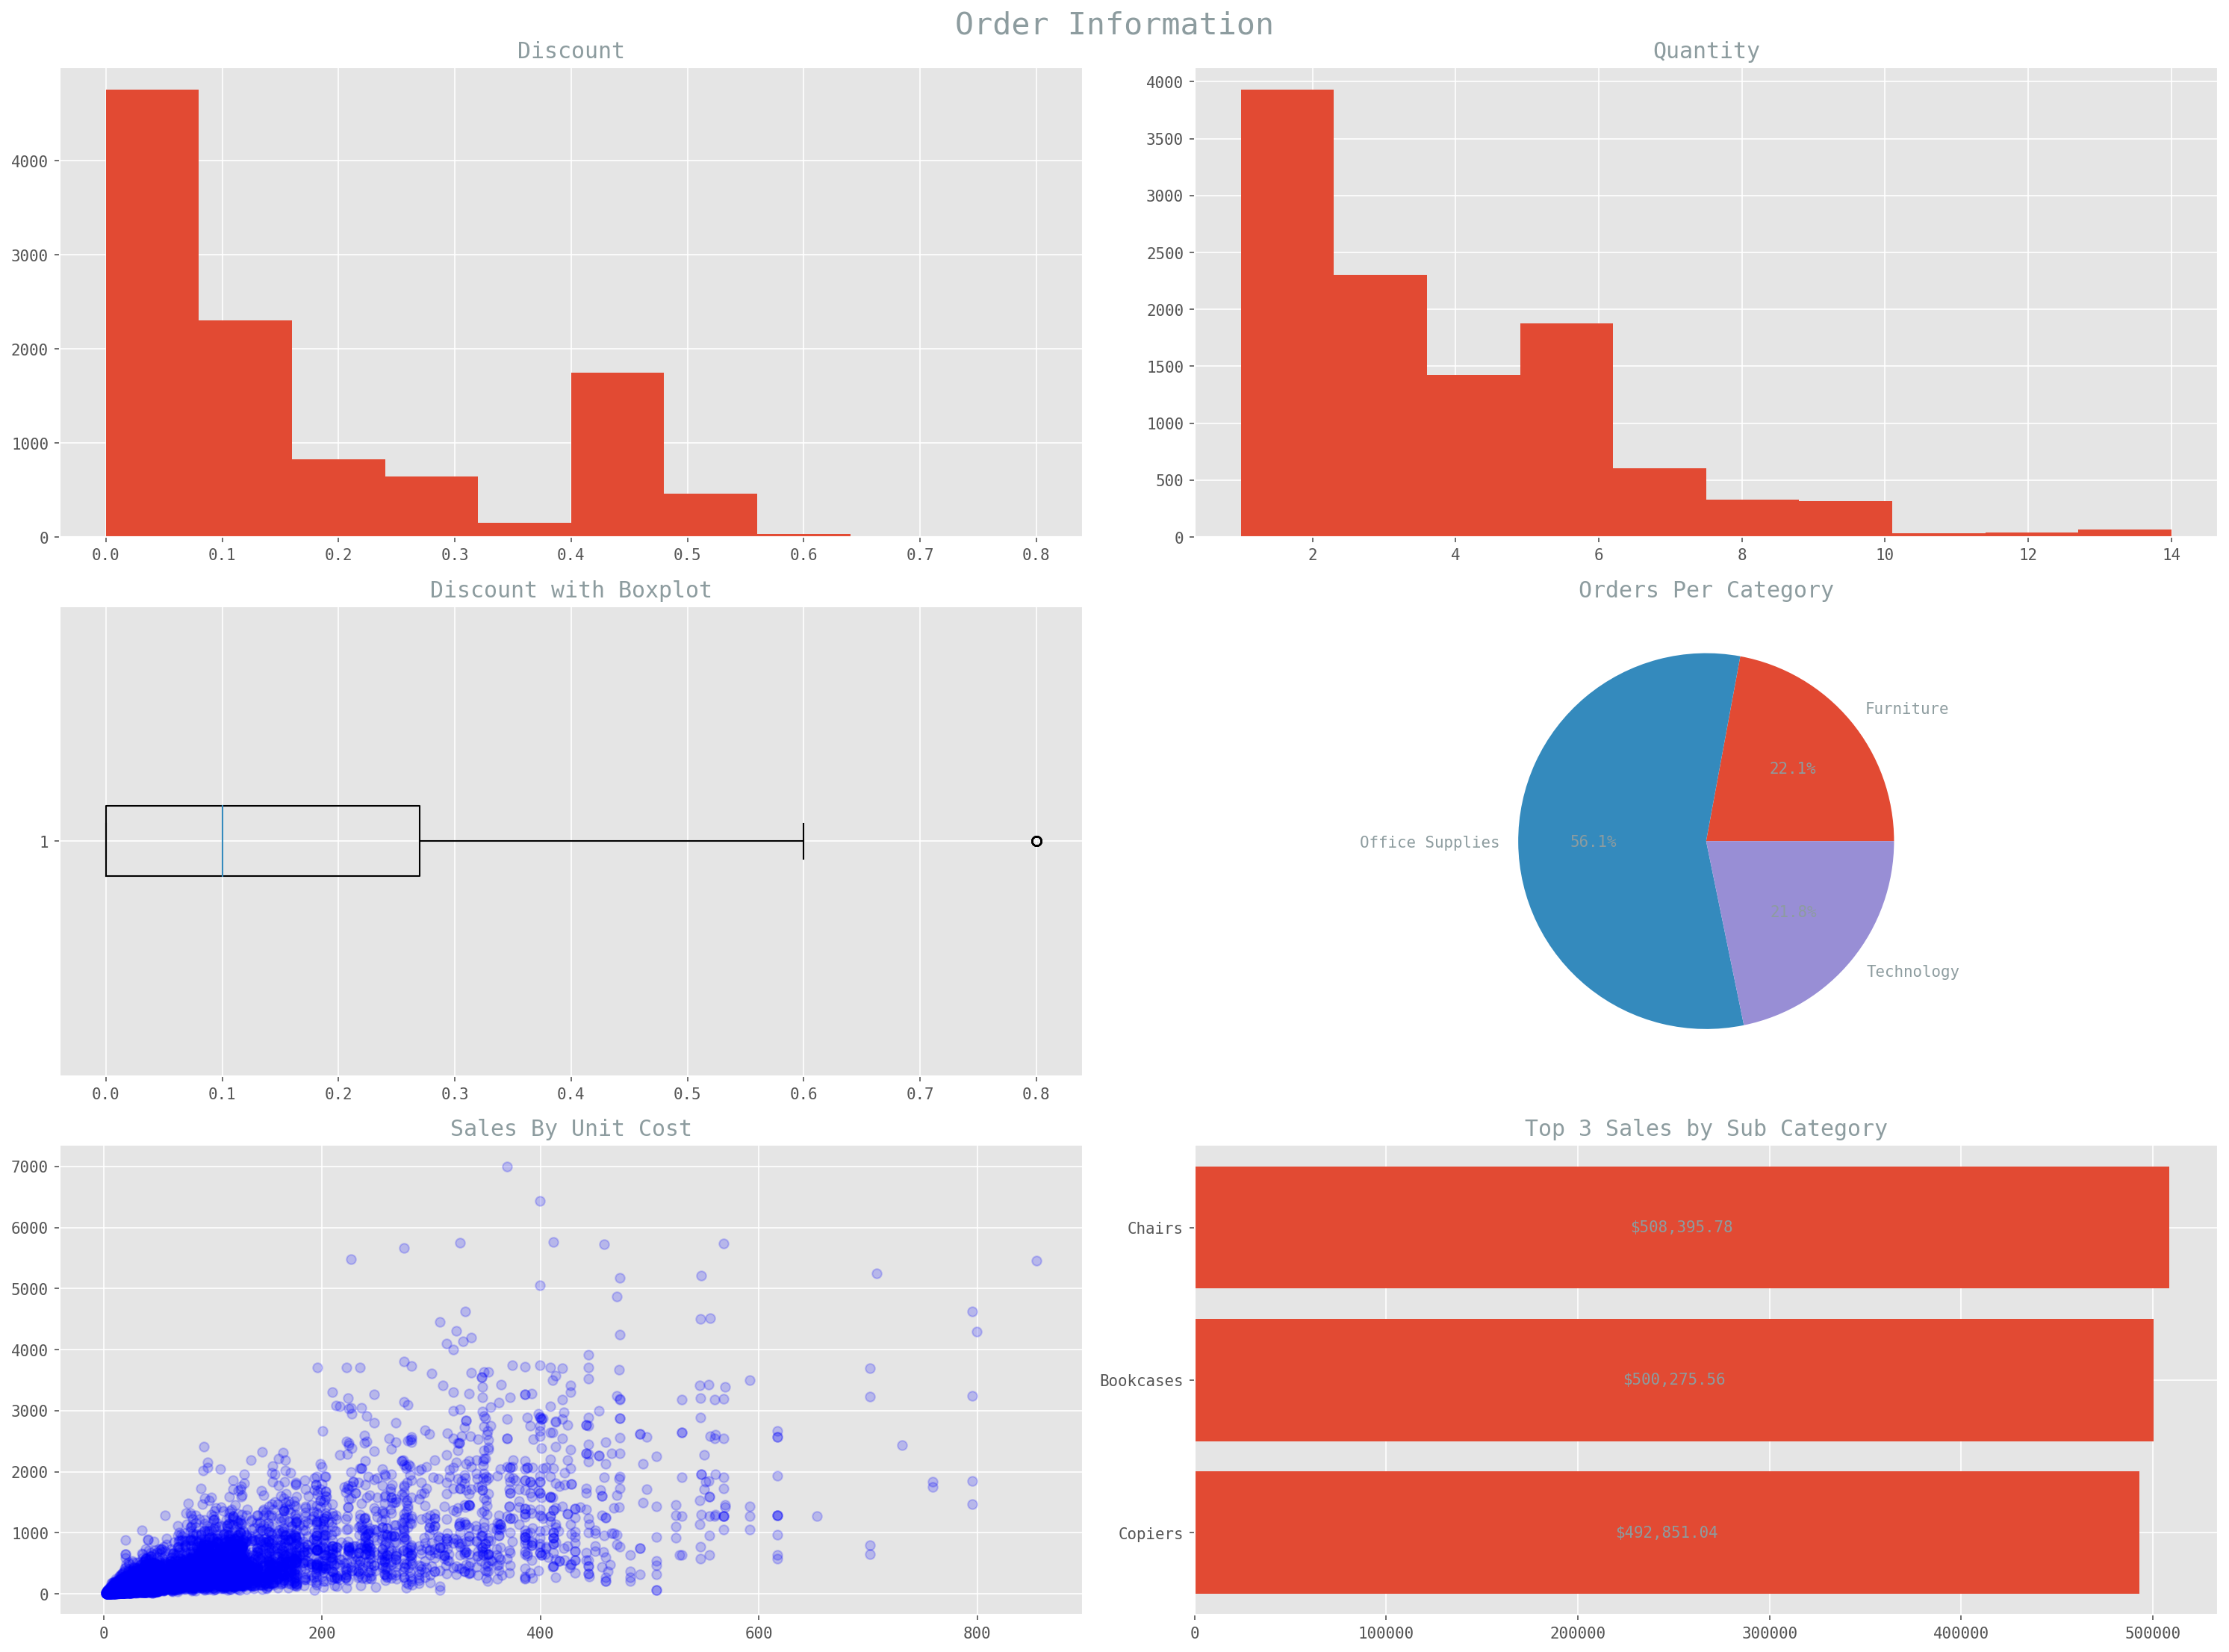

In [13]:
# Setup figure and axes and total size of figure
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
plt.style.use('ggplot')
# You can try other styles such as 'classic', 'ggplot', grayscale'
# Since there are 3 rows and 2 columns, ax will be a two-dimensional array
# the rows are indexed from 0 to 2 and cols are from 0 to 1
# Axes in First row, first column: Row=0, Col=0
ax[0,0].set_title('Discount')
ax[0,0].hist(orders['discount'])

# Row=0,Col=1 : Histogram for quantity
ax[0,1].set_title('Quantity')
ax[0,1].hist(orders['quantity'])

# Second row, first column: Row = 1, Col = 0 - Can use a different type of plot 
ax[1,0].set_title('Discount with Boxplot')
ax[1,0].boxplot(orders['discount'],vert=False)

# Row = 1, Col = 1 : Pie chart for category orders
orders_per_category = orders.groupby('category')['order_id'].count()
ax[1,1].set_title('Orders Per Category')
ax[1,1].pie(orders_per_category, labels=orders_per_category.index, autopct='%1.1f%%')

# Row=2,Col=0 : a scatter plot
ax[2,0].set_title('Sales By Unit Cost')
ax[2,0].plot(orders['unit_cost'],orders['sales'],'o', color='b', alpha=0.2)


# Bar chart for unit cost
sales_by_sub_category = orders.groupby('sub_category')['sales'].sum().sort_values().tail(3).reset_index()
ax[2,1].set_title('Top 3 Sales by Sub Category')
bars = ax[2,1].barh(sales_by_sub_category['sub_category'], sales_by_sub_category['sales'])
ax[2,1].bar_label(bars, label_type='center',  labels=[f'${x:,.2f}' for x in bars.datavalues])


# Set the figure's (super) title
fig.suptitle('Order Information', fontsize=20)

# Fit spacing between all the subplots
fig.tight_layout()
plt.show()

### Bar Charts

One of the subplots above is a bar chart. Matplotlib bar charts take two variables - the series for the x-axis and the height of the bar, which is another series. 

If we are comparing categorical values, we would need to compare based on an aggregation, such as the `sum()`, `mean()`, `count()`, etc.

So we usually use the `groupby()` method to calculate the aggregate value to be plotted on the bar. 

This returns a series. The `reset_index()` method is set the group by values as a column instead of the index. This can be used to convert the series to a DataFrame, then the columns can be extracted.



In [14]:
# Get the mean sales value by category
by_cat = orders.groupby('category')['sales'].mean()

# comment and run this cell again to see the difference when you don't reset the index
by_cat = by_cat.reset_index()
by_cat



,category,sales
0,Furniture,553.131824
1,Office Supplies,143.494081
2,Technology,566.257329


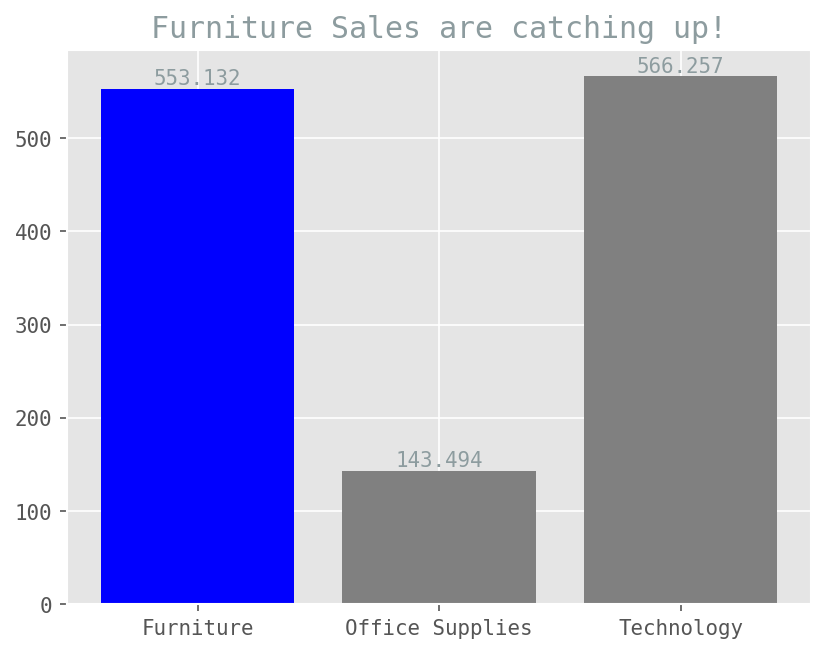

In [15]:
# Plot the bar chart
fig, ax= plt.subplots()
bars = ax.bar(by_cat['category'], by_cat['sales'], color=('b','gray','gray'))
ax.set_title('Furniture Sales are catching up!')
ax.bar_label(bars)
plt.show()

<a id="scatter-plots"></a>
## Customizing Scatter plots

Scatter plots can use more than two dimensions of data in the plot:

- x-axis
- y-axis
- size of marker
- color of marker

Here is an example of creating the scatter plot and setting up the columns to be used on the x- and y- axes, as well as the marker to be used, the size (s) and color (c). Alpha is used to set the transparency. 

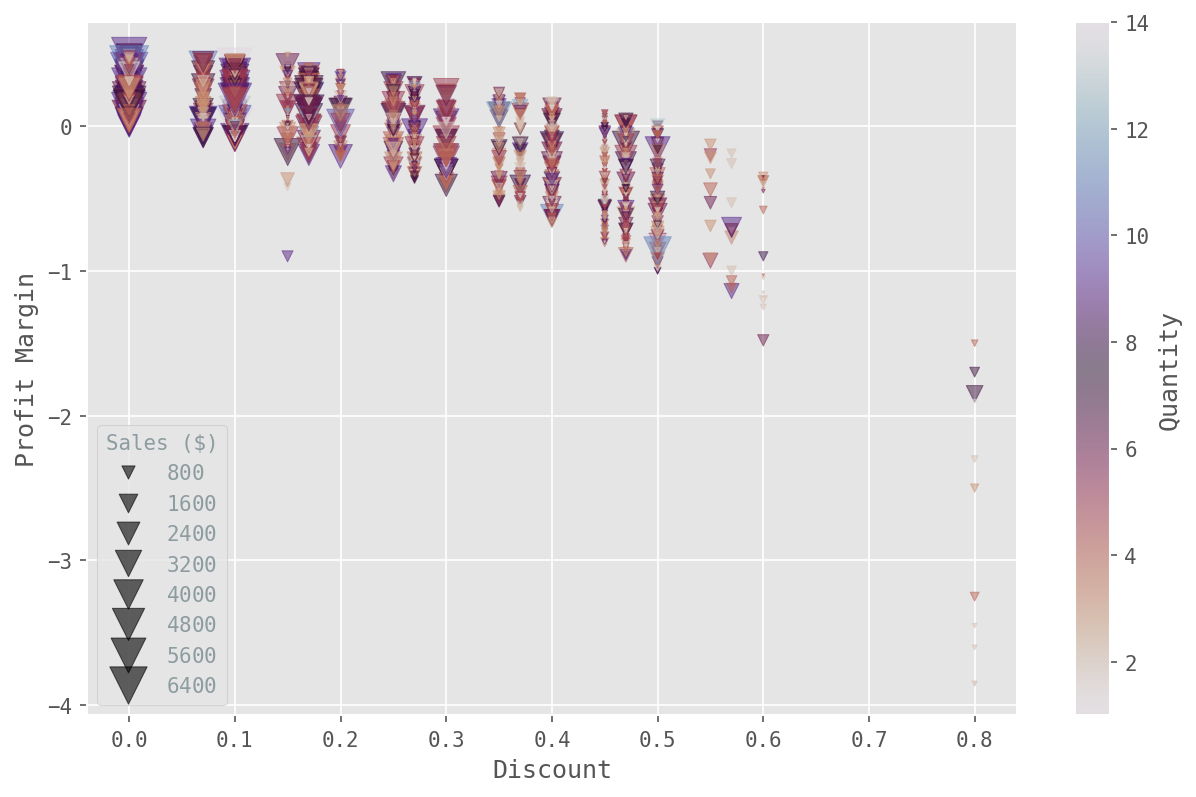

In [16]:
# Setup figure and axes and total size of figure
fig, ax = plt.subplots(figsize=(10,6))

# Create scatter plot and keep a reference to the plot
# Using data series to control the size and color of the markers
scatter = ax.scatter(
    orders['discount'], 
    orders['profit_margin'], 
    s=orders['sales']/20, 
    c = orders['quantity'], 
    marker='v', 
    cmap='twilight_r',
    alpha=0.5)

plt.xlabel('Discount')
plt.ylabel('Profit Margin')

# Show the color bar based on the colors of the markers
cbar = plt.colorbar(scatter)
cbar.set_label('Quantity')


# produce a legend with a cross-section of sizes from the scatter
# The size markers of the legend is an inverse function from the scatter plot marker size
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=lambda x: 20*x)


legend2 = ax.legend(handles, labels, loc="lower left", title="Sales ($)")

plt.show()


### 2.2. The Pyplot interface

We can also use the Pyplot interface to create plots without explicitly specifying the figure and axes. According to the [documentation](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces), the implicit "pyplot" interface keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants.

As you search for help on creating your plots, you may come across code samples that use either approach so it is important to be aware of both.


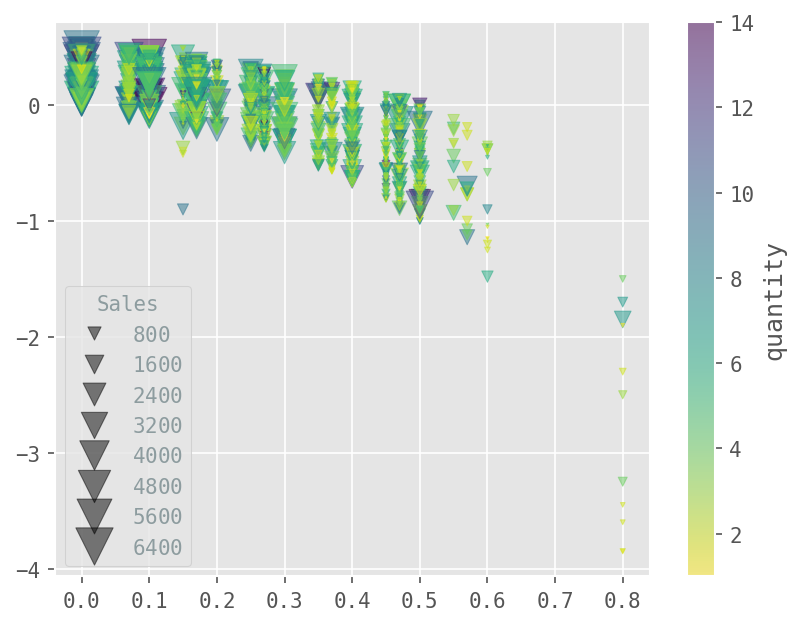

In [17]:
# Example using Pyplot

sc = plt.scatter(orders['discount'],orders['profit_margin'], s=orders['sales']/20, c = orders['quantity'], marker='v', cmap='viridis_r',alpha=0.5)
plt.colorbar(label='quantity')  #assumes colorbar is for the last plotted object
plt.legend(*sc.legend_elements("sizes", func=lambda x: 20*x, num=8), title='Sales')

plt.show()

### Creating Subplots Implicitly

We can create subplots implicitly by adding on subplots to the figure.

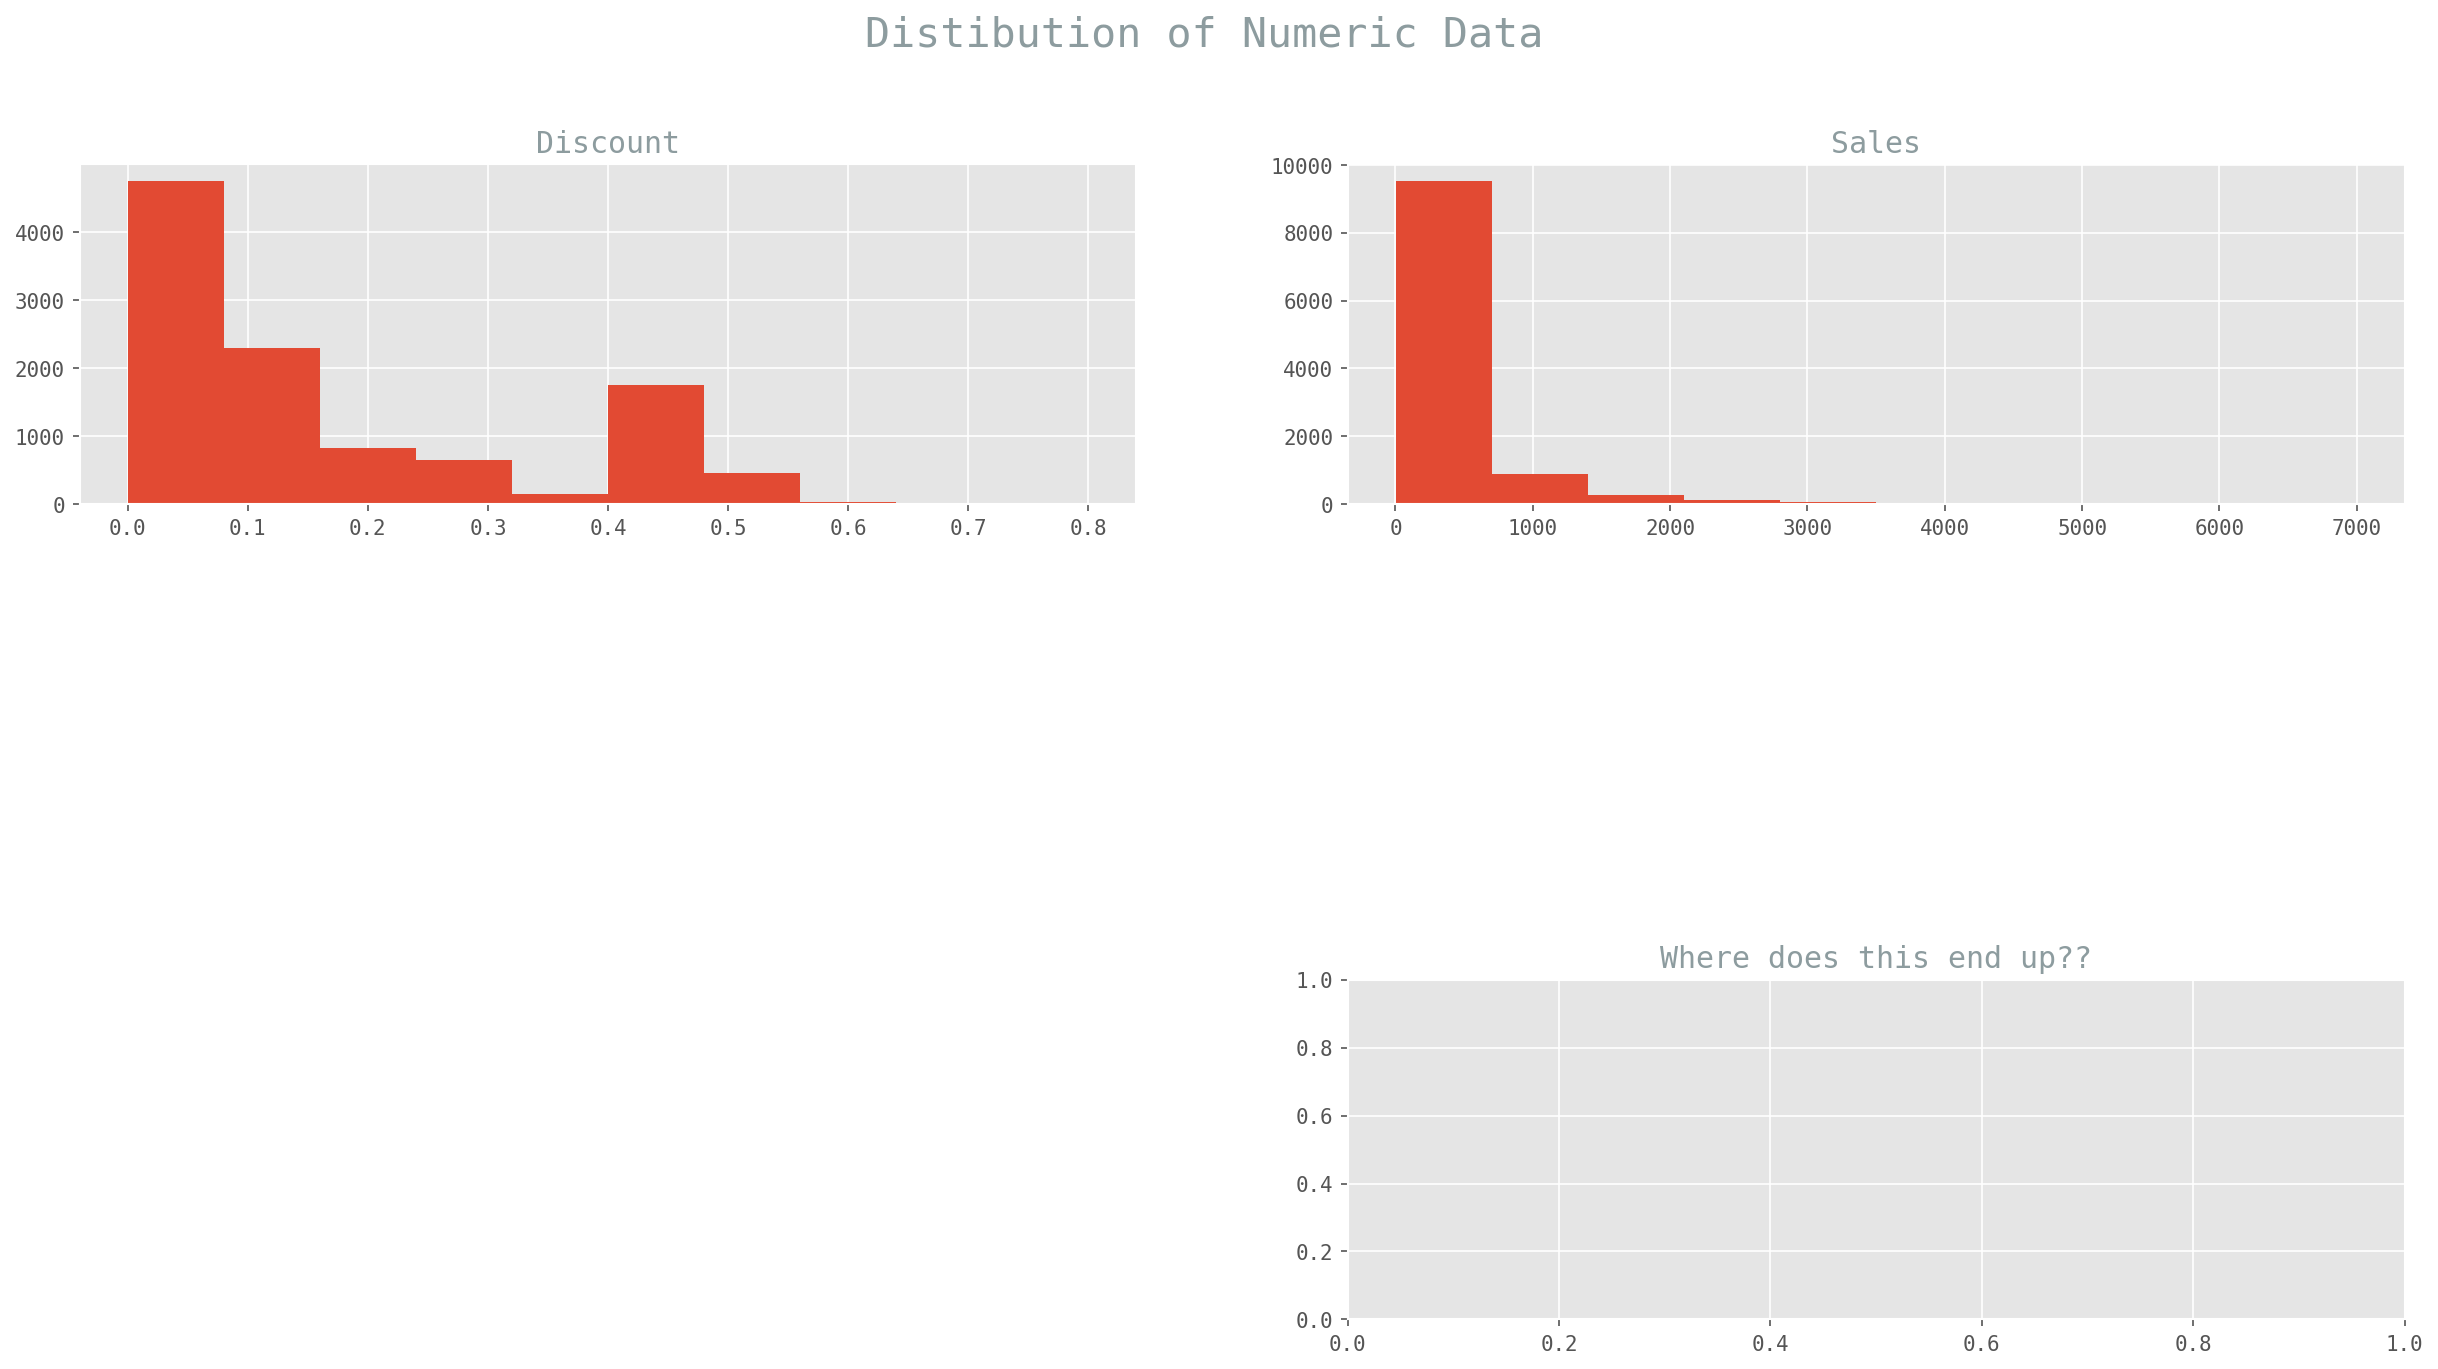

In [18]:
# Creating subplots with pyplot
# Create a figure with width 20 and height 10
plt.figure(figsize=(20,10))

# plt.subplot(3, 2, 1) means we have 3 rows, 2 columns, and are referencing plot (or Axes) 1.
plt.subplot(3,2,1)
plt.title('Discount')
plt.hist(orders['discount'])

# plt.subplot(322) is another (shortcut) way of referencing subplot 2, using the pos= argument.
plt.subplot(322)
plt.title('Sales')
plt.hist(orders['sales'])


# Try to create another subplot
plt.subplot(326)
plt.title('Where does this end up??')

# Set the figure's (super) title
plt.suptitle('Distibution of Numeric Data', fontsize=20)
plt.show()

### Comparing Categories

We can add plots to the same axes, by just calling the required plot functions. In Matplotlib, we can filter the DataFrame by category to compare them.



In [19]:
# Comparing orders for the three categories

furniture = orders[orders['category']=='Furniture']
technology = orders[orders['category']=='Technology']
office = orders[orders['category']=='Office Supplies']



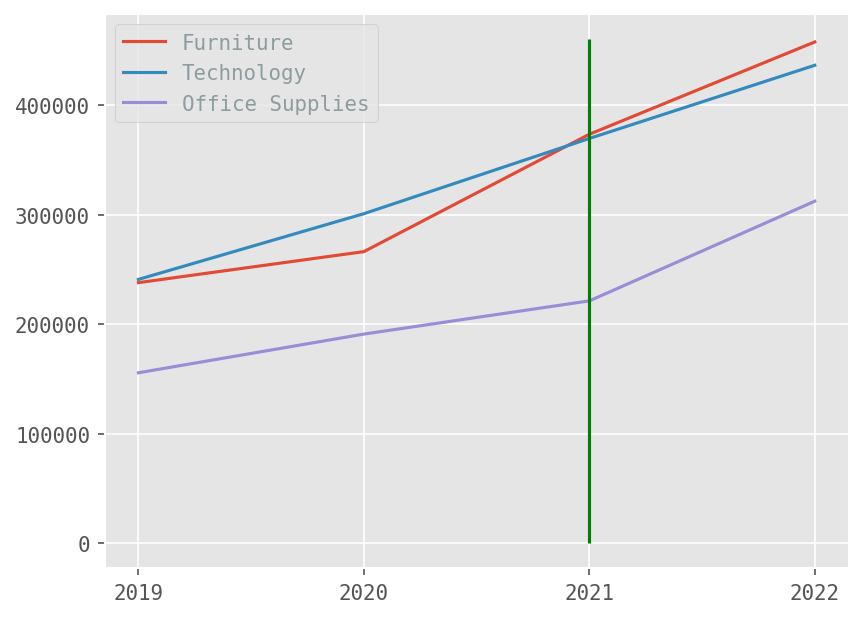

In [20]:
# Plot trends by category
f_sales = furniture.groupby('order_year')['sales'].sum()
t_sales = technology.groupby('order_year')['sales'].sum()
o_sales = office.groupby('order_year')['sales'].sum()

plt.plot(f_sales.index, f_sales.values, label='Furniture')
plt.plot(t_sales.index, t_sales.values, label='Technology')
plt.plot(o_sales.index, o_sales.values, label='Office Supplies')

# add a reference line 
plt.vlines(x=2021, ymin=0, ymax=460000, color='green')

# set the x ticks at the year values so the fractions don't appear
plt.xticks(f_sales.index)
plt.legend()
plt.show()

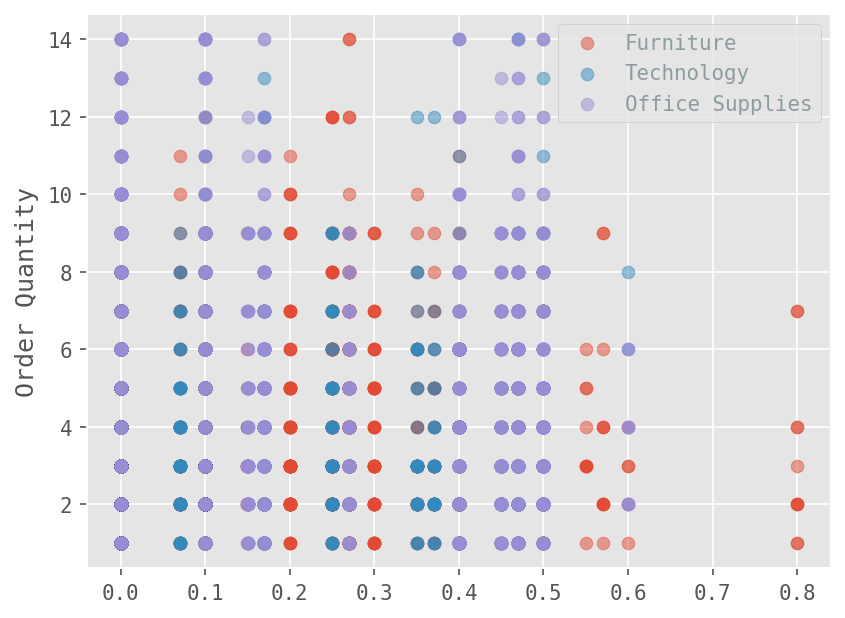

In [21]:
# Scatter plots for the three categories

# Setting alpha = 1 means solid colors, but can't see the overlap.
plt.scatter(furniture['discount'], furniture['quantity'], alpha=0.5, label='Furniture')
plt.scatter(technology['discount'], technology['quantity'],alpha=0.5, label='Technology')
plt.scatter(office['discount'], office['quantity'],alpha=0.5, label='Office Supplies')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

#### Summary

Matplotlib's pyplot module provides customization options on the plots. You can use either approach for creating the plots:

#### Explicitly referencing the figure and axes 

```
fig,ax = plt.subplots(nrows = ..., ncols = ...)
ax.plot(...)
plt.show()
```

#### Using pyplot implicitly
```
plt.plot(...)
plt.show()
```

However, as you can see, it can be quite cumbersome to plot the charts based on the various categorical values. We will look at using other libraries to do this.



### Review and Homework

Let's practice what we have learned in this unit. We will try to create plots based on the `diamondss` data set. You can use either approach to create the plots (or both to compare!). Add titles, text or labels as you wish to practice.


In [22]:
# Make sure you have the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the diamonds data set
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Q1. Create a figure with two subplots to compare the distribution of `price` for the diamonds
- first subplot is a histogram
- second subplot is a boxplot

In [23]:
# Q1 Answer

Q2. Create a bar chart to compare the mean price of diamonds based on the `cut`. Try to set the colors for the bars.


In [24]:
# Q2 Answer

Q3. Create a scatter plot to compare the price vs the carat weight of all the diamonds.

In [25]:
# Q3 Answer

Q4. Filter the diamonds to obtain three dataframes each for the following cuts:
- 'Premium'
- 'Very Good'
- 'Fair'



In [26]:
# Q4 Answer

Q5. Create a scatter plot to compare the price vs carat weight for each of the three cuts (Premium, Very Good and Fair) shown in a different color, using on the three dataframes you have created in Q4.


In [27]:
# Q5 Answer